In [2]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import collections

rd.random()

0.6114369349300137

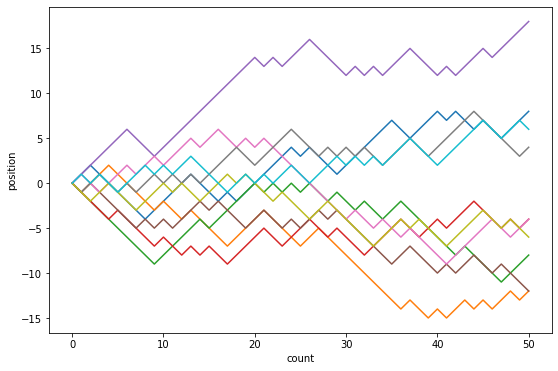

In [25]:
#1 
p = 0.5
F = 0 #random variables

def walk_1D(n) :
    S = 0
    result = [S]
    for i in range(n):
        rdNum = rd.random()
        if rdNum > p : F = 1
        else : F = -1
        S += F 
        result.append(S)
    return result

def alotWalkers(Nwalkers , n) : 
    walkers = []
    for i in range(Nwalkers):
        walkers.append(walk_1D(n))
#         plt.plot(range(0,n+1),walkers[i])
    return walkers

alotWalkers(10,200)

plt.figure(figsize=(9, 6))

for walker in alotWalkers(10,50):
    plt.plot(range(0,51),walker)

plt.xlabel('count')
plt.ylabel('position')

plt.savefig('CW_walk.png')

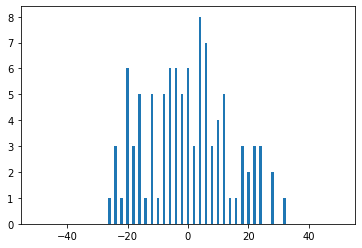

In [101]:
#1D stat

def stat_nth(data, n):
    lattice = np.zeros(201)
    footprint = []
    for walker in data:
        footprint.append(walker[n])
    footprint_counts = collections.Counter(footprint)  # collections.Counter()
    result = [footprint_counts[x] for x in range(-50,51)]
    plt.bar(range(-50,51), result)
        
stat_nth(alotWalkers(100,200), 190)

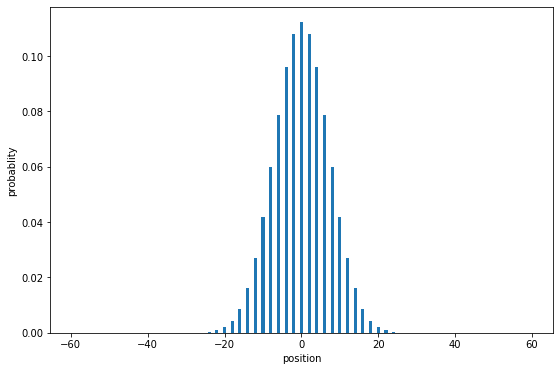

In [26]:
#1D theory

h_length = 201

# lattice = np.zeros([2, h_length ]) # 1열 : 오른쪽, 2열 : 왼쪽
# lattice[:,int((h_length-1)/2)] = np.array([1,1])
lattice = np.zeros([h_length])
lattice[int((h_length-1)/2)]=1

result=[]
for i in range(50):
    lattice *= 0.5
    a = np.insert(lattice[:-1],0,0)
    b = np.append(lattice[1:],0)
    lattice = a+b
    result.append(lattice)
# # def p_walk_1D(lattice, n):
plt.figure(figsize=(9, 6))
plt.bar(range(-59,60), result[49][41:160])

plt.xlabel('position')
plt.ylabel('probablity')
plt.savefig('CW_prob.png')

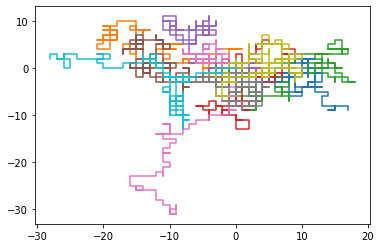

In [146]:
#2d square

p1,p2 = 0.5,0.5

def walk_2D(n) :
    x,y, dx,dy = 0,0,0,0
    result = np.array([[x,y]])
    for i in range(n):
        rdNum = rd.random()
        
        if rdNum >= 1 - (p1*p2) : dx,dy = 1,0
        elif rdNum >= (1-p2) and rdNum < 1 - (p1*p2) : dx,dy = 0,1
        elif rdNum >= (1-p2-p1*(1-p2)) and rdNum < (1-p2) : dx,dy = -1,0
        else : dx,dy = 0,-1
        
        x += dx
        y += dy
        result = np.append(result,np.array([[x,y]]),axis=0)
        # result = np.vstack((result,np.array([[1,2]]))) 와 같음
    return result



def alotWalkers_2D(Nwalkers , n) : 
    walkers = []
    for i in range(Nwalkers):
        walkers.append(walk_2D(n))
        plt.plot(walkers[i][:,0],walkers[i][:,1])
alotWalkers_2D(10 , 200)

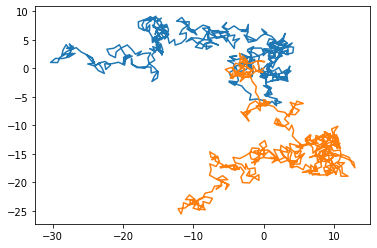

In [77]:
#2d all directions

def walk_2D(n) :
    x,y, dx,dy = 0,0,0,0
    result = np.array([[x,y]])
    for i in range(n):
        rdNum = rd.random()
        theta = rdNum * 2 * np.pi
        dx,dy = np.cos(theta) , np.sin(theta)       
        x += dx
        y += dy
        result = np.append(result,np.array([[x,y]]),axis=0)
        # result = np.vstack((result,np.array([[1,2]]))) 와 같음
    return result



def alotWalkers_2D(Nwalkers , n) : 
    walkers = []
    for i in range(Nwalkers):
        walkers.append(walk_2D(n))
        plt.plot(walkers[i][:,0],walkers[i][:,1])
alotWalkers_2D(2 , 500)

0.75 0.5 0.25
